Done by Padhma Prakash A (21PT17)

# **_Algorithmic Trading Model for Portfolio Optimization_**



In [114]:
# IMPORTING NECESSARY LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

In [115]:
df = pd.read_csv("AAPL_Stock.csv", parse_dates=["Date"])

In [116]:
df.rename(columns={"FIBBG000B9XRY4": "AAPL_CP"}, inplace=True)
df = df.sort_values(by="Date")

### **CALCULATING DAILY RETURNS**

In [118]:
df["Returns"] = (df["AAPL_CP"].shift(0) - df["AAPL_CP"].shift(1)) / df["AAPL_CP"].shift(1)

df["Returns"].fillna(method='bfill', inplace=True)
df["Date"] = df["Date"].dt.date

print(tabulate(df[["Date", "AAPL_CP", "Returns"]], headers='keys', tablefmt='fancy_grid'))



╒═════╤════════════╤═══════════╤══════════════╕
│     │ Date       │   AAPL_CP │      Returns │
╞═════╪════════════╪═══════════╪══════════════╡
│   0 │ 2023-01-03 │   124.216 │  0.0103143   │
├─────┼────────────┼───────────┼──────────────┤
│   1 │ 2023-01-04 │   125.498 │  0.0103143   │
├─────┼────────────┼───────────┼──────────────┤
│   2 │ 2023-01-05 │   124.167 │ -0.010605    │
├─────┼────────────┼───────────┼──────────────┤
│   3 │ 2023-01-06 │   128.735 │  0.0367941   │
├─────┼────────────┼───────────┼──────────────┤
│   4 │ 2023-01-09 │   129.262 │  0.00408901  │
├─────┼────────────┼───────────┼──────────────┤
│   5 │ 2023-01-10 │   129.838 │  0.00445685  │
├─────┼────────────┼───────────┼──────────────┤
│   6 │ 2023-01-11 │   132.579 │  0.0211117   │
├─────┼────────────┼───────────┼──────────────┤
│   7 │ 2023-01-12 │   132.499 │ -0.000598889 │
├─────┼────────────┼───────────┼──────────────┤
│   8 │ 2023-01-13 │   133.84  │  0.0101193   │
├─────┼────────────┼───────────┼────────

**STATES CLASSIFICATION**

In [119]:

df.loc[df["Returns"] >= 0.01, "States"] = 1                                         # Bull state
df.loc[(df["Returns"] > -0.01) & (df["Returns"] < 0.01), "States"] = 0              # Flat state
df.loc[df["Returns"] <= -0.01, "States"] = -1                                       # Bear state

print(tabulate(df[["Date", "AAPL_CP", "Returns", "States"]], headers='keys', tablefmt='fancy_grid'))


╒═════╤════════════╤═══════════╤══════════════╤══════════╕
│     │ Date       │   AAPL_CP │      Returns │   States │
╞═════╪════════════╪═══════════╪══════════════╪══════════╡
│   0 │ 2023-01-03 │   124.216 │  0.0103143   │        1 │
├─────┼────────────┼───────────┼──────────────┼──────────┤
│   1 │ 2023-01-04 │   125.498 │  0.0103143   │        1 │
├─────┼────────────┼───────────┼──────────────┼──────────┤
│   2 │ 2023-01-05 │   124.167 │ -0.010605    │       -1 │
├─────┼────────────┼───────────┼──────────────┼──────────┤
│   3 │ 2023-01-06 │   128.735 │  0.0367941   │        1 │
├─────┼────────────┼───────────┼──────────────┼──────────┤
│   4 │ 2023-01-09 │   129.262 │  0.00408901  │        0 │
├─────┼────────────┼───────────┼──────────────┼──────────┤
│   5 │ 2023-01-10 │   129.838 │  0.00445685  │        0 │
├─────┼────────────┼───────────┼──────────────┼──────────┤
│   6 │ 2023-01-11 │   132.579 │  0.0211117   │        1 │
├─────┼────────────┼───────────┼──────────────┼─────────

# **DATA ANALYSIS**


STATS: Closing Prices and Returns (APPLE STOCKS)

╒═════════╤═════════╤══════════════╤════════════╤═════════════╤══════════════╤══════════════╤══════════════╤═════════════╕
│ index   │   count │         mean │        std │         min │          25% │          50% │          75% │         max │
╞═════════╪═════════╪══════════════╪════════════╪═════════════╪══════════════╪══════════════╪══════════════╪═════════════╡
│ AAPL_CP │     250 │ 171.902      │ 17.4818    │ 124.167     │ 161.252      │ 175.021      │ 186.939      │ 197.857     │
├─────────┼─────────┼──────────────┼────────────┼─────────────┼──────────────┼──────────────┼──────────────┼─────────────┤
│ Returns │     250 │   0.00186884 │  0.0125561 │  -0.0480201 │  -0.00588611 │   0.00201943 │   0.00895045 │   0.0469269 │
╘═════════╧═════════╧══════════════╧════════════╧═════════════╧══════════════╧══════════════╧══════════════╧═════════════╛




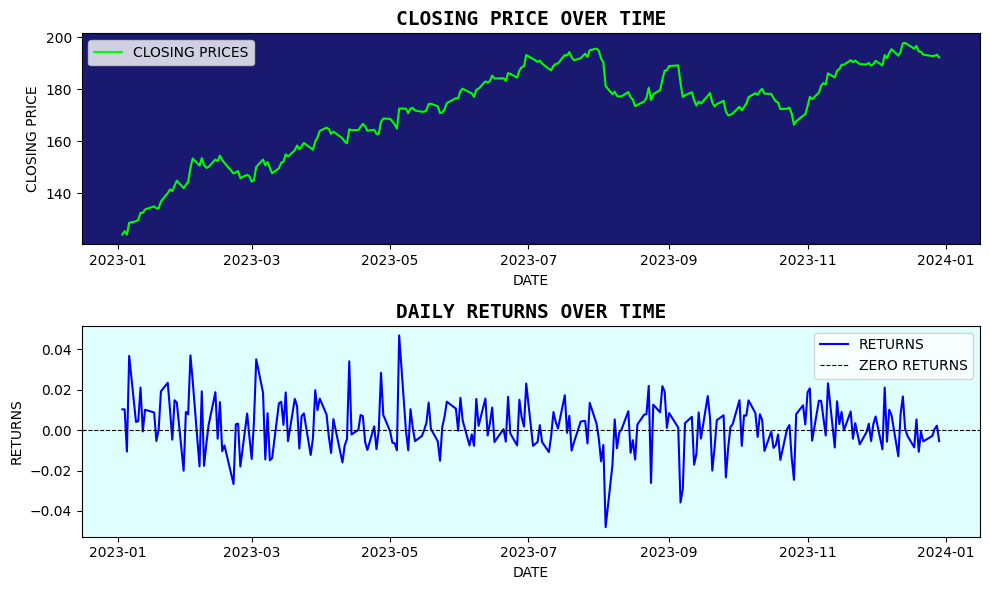

In [120]:
print("\nSTATS: Closing Prices and Returns (APPLE STOCKS)\n")
print(tabulate(stats_table, headers='keys', tablefmt='fancy_grid', showindex=False))
plt.figure(figsize=(10, 6))

# CLOSING PRICES
plt.subplot(2, 1, 1)
plt.plot(df["Date"], df["AAPL_CP"], label="CLOSING PRICES", color="lime")
plt.title("CLOSING PRICE OVER TIME",fontdict={'fontsize': 14, 'fontweight': 'bold', 'fontfamily': 'monospace'})
plt.xlabel("DATE")
plt.ylabel("CLOSING PRICE")
plt.gca().set_facecolor('midnightblue')
plt.legend()

print("\n")

# RETURNS
plt.subplot(2, 1, 2)
plt.plot(df["Date"], df["Returns"], label="RETURNS", color="blue")
plt.title("DAILY RETURNS OVER TIME",fontdict={'fontsize': 14, 'fontweight': 'bold', 'fontfamily': 'monospace'})
plt.xlabel("DATE")
plt.ylabel("RETURNS")
plt.axhline(0, color="black", linestyle="--", linewidth=0.8, label="ZERO RETURNS")
plt.gca().set_facecolor('lightcyan')
plt.legend()

plt.tight_layout()
plt.show()

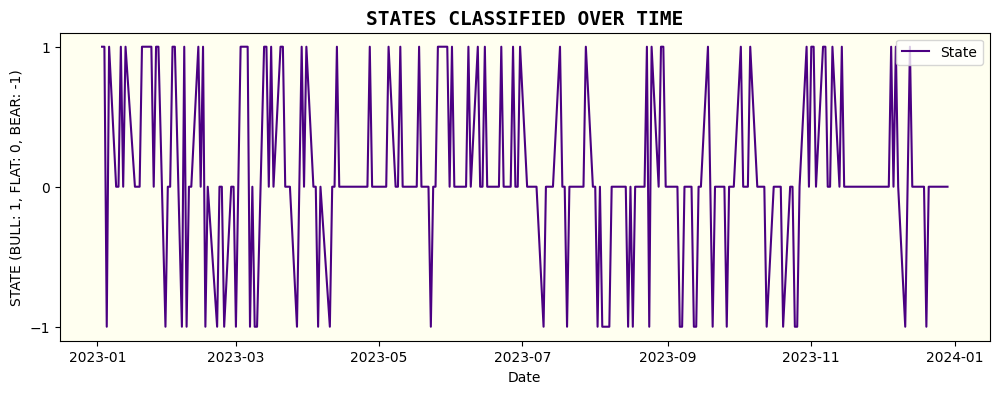

In [108]:
# STATES
plt.figure(figsize=(12, 4))
plt.plot(df["Date"], df["States"], label="State", color="indigo")
plt.title("STATES CLASSIFIED OVER TIME", fontdict={'fontsize': 14, 'fontweight': 'bold', 'fontfamily': 'monospace'})
plt.xlabel("Date")
plt.ylabel("STATE (BULL: 1, FLAT: 0, BEAR: -1)")
plt.gca().set_facecolor('ivory')
plt.yticks([-1, 0, 1])
plt.legend()
plt.show()

In [121]:
# -- PORTFOLIO VALUE OBTAINED (PERFORMING BUY TRADES ON ALL DAYS) --
# NON OPTIMAL SOLUTION

pfVAL = 0  # ---> PORTFOLIO VALUE V(N)
data = []
for i in range(1, len(df)):
    curr_state = df.loc[i, 'States']
    prev_state = df.loc[i - 1, 'States']

    if curr_state == 1 and prev_state == 0:
        pfVAL += 1

    elif curr_state == -1 and prev_state == 0:
        pfVAL -= 1


    data.append([f"Day {i}", pfVAL])

headers = ["Day", "Portfolio Value", "Buy Orders"]
print(tabulate(data, headers=headers, tablefmt='fancy_grid'))

print(f"\nPortfolio Value obtained: {pfVAL}")


╒═════════╤═══════════════════╕
│ Day     │   Portfolio Value │
╞═════════╪═══════════════════╡
│ Day 1   │                 0 │
├─────────┼───────────────────┤
│ Day 2   │                 0 │
├─────────┼───────────────────┤
│ Day 3   │                 0 │
├─────────┼───────────────────┤
│ Day 4   │                 0 │
├─────────┼───────────────────┤
│ Day 5   │                 0 │
├─────────┼───────────────────┤
│ Day 6   │                 1 │
├─────────┼───────────────────┤
│ Day 7   │                 1 │
├─────────┼───────────────────┤
│ Day 8   │                 2 │
├─────────┼───────────────────┤
│ Day 9   │                 2 │
├─────────┼───────────────────┤
│ Day 10  │                 2 │
├─────────┼───────────────────┤
│ Day 11  │                 2 │
├─────────┼───────────────────┤
│ Day 12  │                 3 │
├─────────┼───────────────────┤
│ Day 13  │                 3 │
├─────────┼───────────────────┤
│ Day 14  │                 3 │
├─────────┼───────────────────┤
│ Day 15

# **_OPTIMIZED PORTFOLIO VALUE_**


--->  Performing Buy order trade when the current day is "**FLAT**" and followed by a "**BULL**"

In [124]:
pfVAL = 0
n_ord = 0
buy_indices = []

for i in range(1, len(df)):
    curr_state = df.loc[i, 'States']
    prev_state = df.loc[i - 1, 'States']

    if curr_state == 1 and prev_state == 0:
        pfVAL += 1
        n_ord += 1
        buy_indices.append(i)

print(f">>> FINAL PORTFOLIO VALUE: {pfVAL}")

if buy_indices:
    opt = df.loc[buy_indices, ["Date", "AAPL_CP", "Returns"]].reset_index(drop=True)
    opt["OPTIMAL BUY INDEX"] = buy_indices

    print("\nOPTIMAL BUY INDICES:")
    print(tabulate(opt, headers='keys', tablefmt='fancy_grid'))


>>> FINAL PORTFOLIO VALUE: 40

OPTIMAL BUY INDICES:
╒════╤════════════╤═══════════╤═══════════╤═════════════════════╕
│    │ Date       │   AAPL_CP │   Returns │   OPTIMAL BUY INDEX │
╞════╪════════════╪═══════════╪═══════════╪═════════════════════╡
│  0 │ 2023-01-11 │   132.579 │ 0.0211117 │                   6 │
├────┼────────────┼───────────┼───────────┼─────────────────────┤
│  1 │ 2023-01-13 │   133.84  │ 0.0101193 │                   8 │
├────┼────────────┼───────────┼───────────┼─────────────────────┤
│  2 │ 2023-01-20 │   136.929 │ 0.0192204 │                  12 │
├────┼────────────┼───────────┼───────────┼─────────────────────┤
│  3 │ 2023-01-26 │   142.977 │ 0.0148036 │                  16 │
├────┼────────────┼───────────┼───────────┼─────────────────────┤
│  4 │ 2023-02-02 │   149.791 │ 0.0370624 │                  21 │
├────┼────────────┼───────────┼───────────┼─────────────────────┤
│  5 │ 2023-02-13 │   153.033 │ 0.0188072 │                  28 │
├────┼────────────┼─────

**TRANSITION DISTRIBUTIONS (STREAMED MANNER)**

In [133]:
def TransDist(dataframe):

    transMatrix = np.zeros((3, 3))
    state_labels = ["Bear", "Flat", "Bull"]

    for i in range(1, len(dataframe)):
        curr_state = int(dataframe.at[dataframe.index[i], 'States'])
        prev_state = int(dataframe.at[dataframe.index[i-1], 'States'])
        transMatrix[prev_state + 1, curr_state + 1] += 1
        normMatrix = transMatrix / np.sum(transMatrix, axis=1, keepdims=True)
        yield normMatrix, state_labels

max_tables = 5
printed = 0

for td, state_labels in TransDist(df):

    if printed < max_tables or len(df) - printed <= max_tables:
        table = tabulate(td, headers=state_labels, showindex=state_labels, tablefmt="fancy_grid")

        print(f"\nTransition Distribution({printed + 1}):")
        print(table)
        printed += 1

print("\n...... Intermediate results ......\n")

for td, state_labels in TransDist(df):
    pass

final_table = tabulate(td, headers=state_labels, showindex=state_labels, tablefmt="fancy_grid")

print(f"\n\nFINAL TRANSITION DISTRIBUTION:\n")
print(final_table)
print("\n\n")


Transition Distribution(1):
╒══════╤════════╤════════╤════════╕
│      │   Bear │   Flat │   Bull │
╞══════╪════════╪════════╪════════╡
│ Bear │    nan │    nan │    nan │
├──────┼────────┼────────┼────────┤
│ Flat │    nan │    nan │    nan │
├──────┼────────┼────────┼────────┤
│ Bull │      0 │      0 │      1 │
╘══════╧════════╧════════╧════════╛

Transition Distribution(2):
╒══════╤════════╤════════╤════════╕
│      │   Bear │   Flat │   Bull │
╞══════╪════════╪════════╪════════╡
│ Bear │  nan   │    nan │  nan   │
├──────┼────────┼────────┼────────┤
│ Flat │  nan   │    nan │  nan   │
├──────┼────────┼────────┼────────┤
│ Bull │    0.5 │      0 │    0.5 │
╘══════╧════════╧════════╧════════╛

Transition Distribution(3):
╒══════╤════════╤════════╤════════╕
│      │   Bear │   Flat │   Bull │
╞══════╪════════╪════════╪════════╡
│ Bear │    0   │      0 │    1   │
├──────┼────────┼────────┼────────┤
│ Flat │  nan   │    nan │  nan   │
├──────┼────────┼────────┼────────┤
│ Bull │    0

<ipython-input-133-a1100d9e57b9>:10: RuntimeWarning: invalid value encountered in divide
  normMatrix = transMatrix / np.sum(transMatrix, axis=1, keepdims=True)
